**Author name(s):** <span style="color:red">Jan Izquierdo and Carmen Samedi</span>

# Systems & Network Biology - PRACTICAL 8

# Dynamics of feed-forward loops

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula Global***.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

In this practical session we will integrate the equations of a coherent feed-forward loop (FFL) with AND logic at the last step:

$$
\frac{dy}{dt}=\beta_y\frac{x^n}{K_{xy}^n+x^n}-\delta_y y
$$
$$
\frac{dz}{dt}=\beta_z\frac{x^m}{K_{xz}^m+x^m}\frac{y^p}{K_{yz}^p+y^p}-\delta_z z
$$

We will consider the following parameters: $\beta_y=10$, $\beta_z=50$, $\delta_y=\delta_z=0.1$, $K_{xy}=10$, $K_{xz}=20$, $K_{yz}=40$, and $n=m=p=4$.

First, define a function of time that represents a square pulse with $x=0$ if $t<T_{on}$ and $t>T_{off}$, and $x=X_{on}$ otherwise. Plot this function for $T_{on}=10$, $T_{off}=20$, and $X_{on}=50$ (let time run from 0 to 50, for instance).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [12]:
def xpulse(t):
    if t<=T_on or t>=T_off:
        return 0
    else:
        return X_on

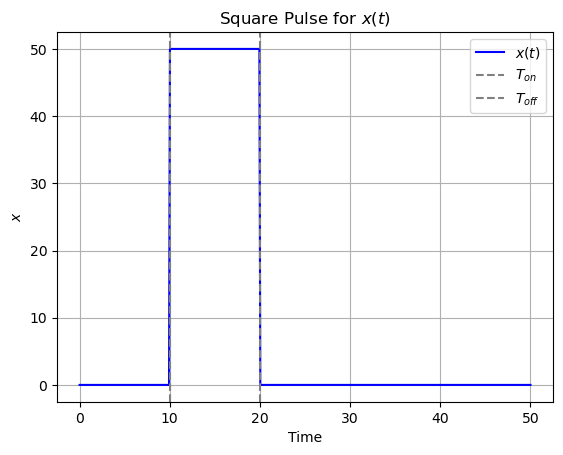

In [13]:
T_on = 10
T_off = 20
X_on = 50
time = np.linspace(0, 50, 500)

x_values = [xpulse(t) for t in time]
# Plot the pulse
plt.plot(time, x_values, label='$x(t)$', color='blue')
plt.xlabel('Time')
plt.ylabel('$x$')
plt.title('Square Pulse for $x(t)$')
plt.grid(True)
plt.axvline(x=T_on, color='gray', linestyle='--', label='$T_{on}$')
plt.axvline(x=T_off, color='gray', linestyle='--', label='$T_{off}$')
plt.legend()
plt.show()

Next, simulate the response of the FFL (in terms of both $y$ and $z$) to the square pulse in $x$ calculated above.

In [14]:
# coherent feedforward loop
def cffl(YZ, t):
    y, z = YZ
    x = xpulse(t)
    dy = betay*x**n/(Kxy**n + x**n) - deltay*y
    dz = (betaz*x**m/(Kxz**m + x**m))*(y**p/(Kyz**p + y**p)) - deltaz*z
    return [dy, dz]

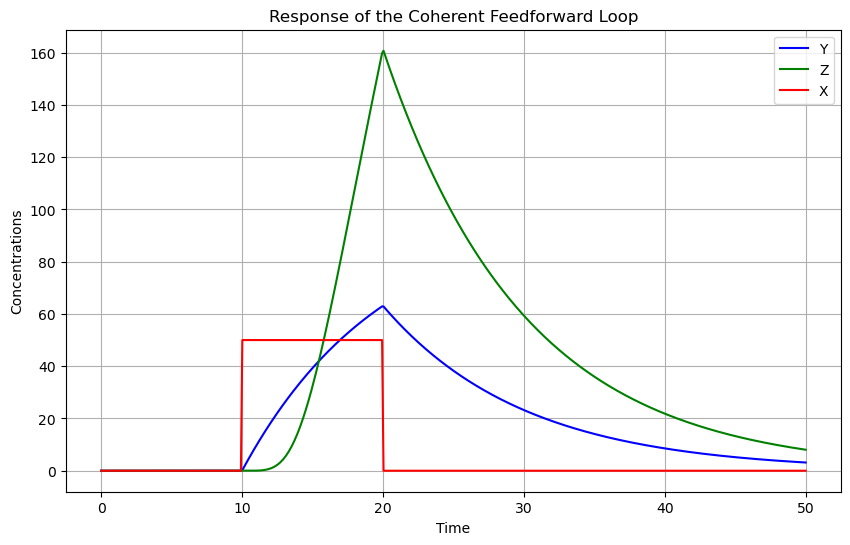

In [15]:

T_on = 10
T_off = 20
X_on = 50

betay = 10
betaz = 50
deltay = deltaz = 0.1
Kxy = 10
Kxz = 20
Kyz = 40
n = m = p = 4

Y0 = [0, 0]
t = np.linspace(0, 50, 500)


solution = odeint(cffl, Y0, t)
y = solution[:, 0]  # y(t) solution
z = solution[:, 1]  # z(t) solution


plt.figure(figsize=(10, 6))
plt.plot(t, y, label=r'Y', color='blue')

plt.plot(t, z, label=r'Z', color='green')

x_values = [xpulse(ti) for ti in t]
plt.plot(t, x_values, label=r'X', color='red')
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.title('Response of the Coherent Feedforward Loop')
plt.legend()
plt.grid(True)
plt.show()

Interpret the results in terms of the different delays:

Describe and comment clearly your result, in your own words. 


<span style="color:red"> In a coherent feedforward loop, we have a consistent signal; Z is receiving the same from both X and Y. We observe on the plot, the first concentration increasing is X, since Y needs X to be high then we have a bit of delay from X to Y and then we have another delay for Z. Now that both X and Y are relatively high, Z can increase (and it does, quite remarkably). We observe the highest peak right when X immediately decreases. The second X decreases, we  have a delay, where y starts gradually decreasing and as does Z. This plot represents a good asynchronous feedforward positive loop, starting a delay but having none in the end for both Z and Y is perfect representing certain metabolisms, like the e.coli. 
</span>

To compare the behavior shown above with the case of a simple cascade, repeat the simulation removing the feedforward connection from X to Z.

In [16]:
def cascade(YZ, t):
    y, z = YZ
    x = xpulse(t)
    dy = betay*x**n/(Kxy**n + x**n) - deltay*y
    dz = betaz*y**p/(Kyz**p + y**p) - deltaz*z
    return [dy, dz]

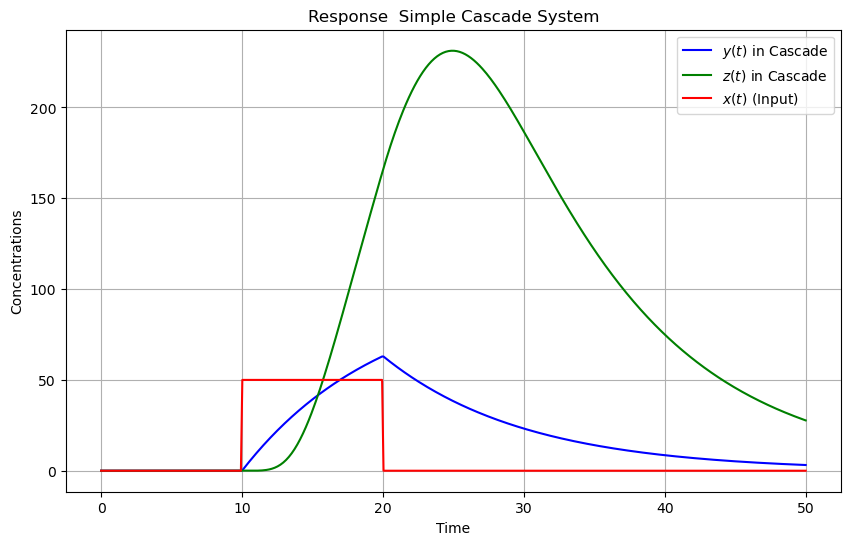

In [17]:
Y0 = [0, 0]
cascade_solution = odeint(cascade, Y0, t)
y_cascade = cascade_solution[:, 0] 
z_cascade = cascade_solution[:, 1]  


plt.figure(figsize=(10, 6))

plt.plot(t, y_cascade, label=r'$y(t)$ in Cascade', color='blue')
plt.plot(t, z_cascade, label=r'$z(t)$ in Cascade', color='green')
x_values = [xpulse(ti) for ti in t]
plt.plot(t, x_values, label=r'$x(t)$ (Input)', color='red')


plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.title('Response  Simple Cascade System')
plt.legend()
plt.grid(True)
plt.show()

Describe and comment clearly your result, in your own words. 

<span style="color:red">
With this cascade representation, we observe on the plot more delays. 
When X starts increasing we have a bit of delay for Y to start producing and a following. We observe a really big increase in Z. When X bruptly decreases, we observe a relatively fast reaction from Y which also starts decreasing, however for Z there is a big delay. This delay happens because at the beginning Y is still a bit higher than the threshold so Z is still going to be produced until our Y is less than the threshold. This would be a problem in the metabolism of E.coli for example. 

</span>

Next, consider again the full feedforward loop. Apply an input X pulse of various durations and study the response of $z$.

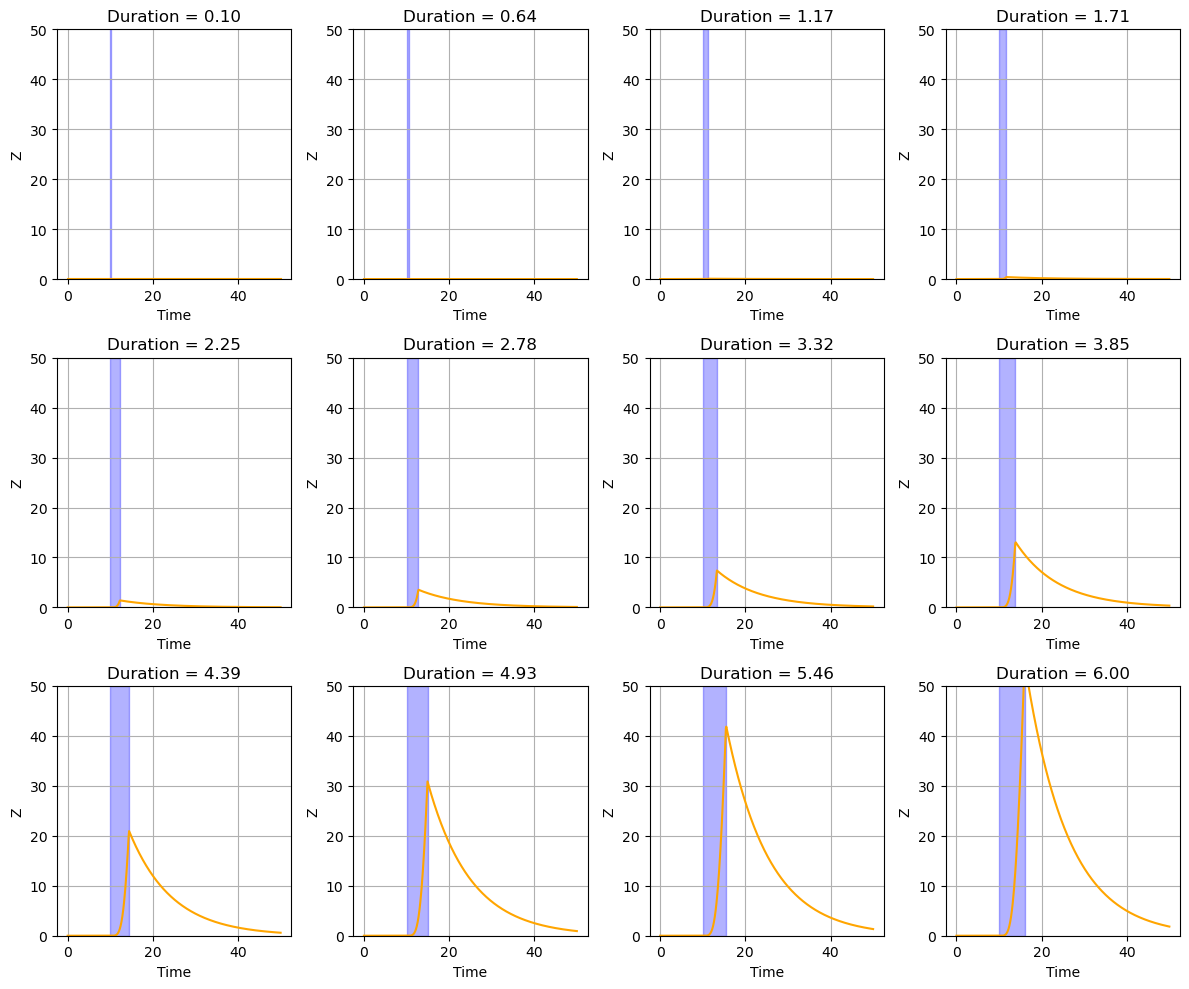

In [18]:
betay = 10
betaz = 50
deltay = deltaz = 0.1
Kxy = 10
Kxz = 20
Kyz = 40
n = m = p = 4
T_on = 10
X_on = 50


# Initial conditions
Y0 = [0, 0]  
t = np.linspace(0, 50, 500)  

pulse_durations = [0.10, 0.64, 1.17, 1.71, 2.25, 2.78, 3.32, 3.85, 4.39, 4.93, 5.46, 6]

fig, axes = plt.subplots(3, 4, figsize=(12, 10))
axes = axes.flatten()

for i, duration in enumerate(pulse_durations):
    global T_off  # Allow modifying T_off globally
    T_off = T_on + duration  # Set the end of the pulse
    
    solution = odeint(cffl, Y0, t, hmax=0.1)
    z = solution[:, 1]  # Extract z(t) for plotting

    ax = axes[i]
    ax.plot(t, z, color='orange', label=r'$z(t)$')
    ax.axvspan(T_on, T_off, color='blue', alpha=0.3)  # Highlight pulse duration
    ax.set_title(f'Duration = {duration:.2f}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Z')
    ax.set_ylim([0, 50])
    ax.grid(True)

plt.tight_layout()
plt.show()

Describe and comment clearly your result, in your own words.


<span style="color:red">
The plots above show the production of Z according on the time X is produced. This shows an incredibly sensitive loop where for Z to be produced, not only is there X to be produced as well but also it needs to be produced for a certain amount of time. We can see the longer the production of X is, the more production of Z we have. This has such control : we need for X to be produced enough and enough time, for y to be produced and only then can we produce Z. This is an accurate representation of cells as they depend on many factors like time, concentration, temperature... 

</span>

Finally, we'll study the response of an incoherent feedforward loop to a step pulse of X, such that $x=0$ if $t<T_{on}$  and $x=X_{on}$ otherwise. We'll use as before $T_{on}=10$ and $X_{on}=50$. Rewrite the differential equation model describe above for a situation in which X activates both Y and Z, and Y represses Z, and assume that Z integrates its inputs via an AND gate, as before:

$$
\frac{dz}{dt}=\beta_z\frac{x^m}{K_{xz}^m+x^m}\frac{1}{1+(y/K_{yz})^p}-\delta_z z
$$

Integrate the system for the step pulse described above, and plot the resulting response of Z.

In [19]:
# incoherent feedforward loop
def iffl(YZ, t):
    y, z = YZ
    x = step(t)
    dy = betay*x**n/(Kxy**n + x**n) - deltay*y
    dz = betaz*x**m/(Kxz**m + x**m)/(1 + (y/Kyz)**p) - deltaz*z
    return [dy, dz]

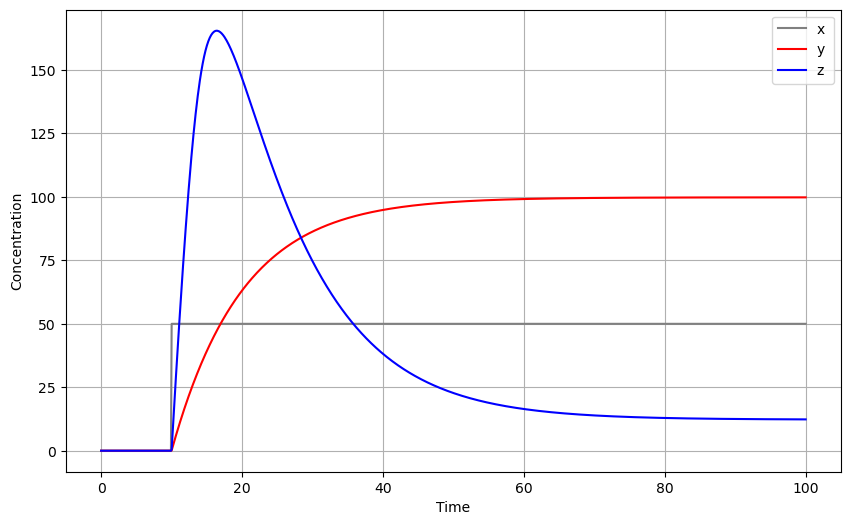

In [20]:
betay = 10
betaz = 50
deltay = deltaz = 0.1
Kxy = 10
Kxz = 20
Kyz = 40
n = m = p = 4
T_on = 10
X_on = 50

def step(t):
    if t < T_on:
        return 0
    else:
        return X_on

values_0 = [0, 0]  

# Time points for integration
t_values = np.linspace(0, 100, 1000)  # Simulate for 100 seconds with fine resolution

# Solve the system of ODEs
solution = odeint(iffl, values_0, t_values)

# Extract y(t) and z(t) from the solution
y_values = solution[:, 0]
z_values = solution[:, 1]

# Calculate x(t) for plotting
x_values = [step(ti) for ti in t_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label="x", color="gray")
plt.plot(t_values, y_values, label="y", color="red")
plt.plot(t_values, z_values, label="z ", color="blue")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.show()

Describe and comment clearly your result, in your own words, 

<span style="color:red">
An incoherent feedforward loop is a loop where the Z is not receiving the same signal from both X and Y, in our case it is repressed by Y but activated by X. Y is activated by X as well. 
On the plot we observe a non stop activation of X, this time there is no limit, since X activates Z then Z immediately peaks and starts producing, we no longer have the delay we used to have with coherent feedforward loops. Y however is not as quick as Z and has a much less significant peak, its growth is gradual. As Y increases, we observe that Z gradually decreases, as we mentioned before, Y represses Z. 
Since we have no limit of X and it continues producing, Y has an asymptotic curve which goes on for as long as X goes on. Z doesn't have an asymptotic curve but it does eventually reach an more steady state, where the repression and activation of Z are equal. 
The constant production of X allows us to focus on the behavior of Y on Z
This system could biologically represent a gene (Z) that is very sensitive to a certain activity (X) but is still regulated (Y), maybe an expression in a cell that is only necessary temporarely or a response that is meant to be short. 


</span>